In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("titanic-passengers.csv",encoding="ISO-8859-1",sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()
# 177 in Age
# 687 in Cabin 
# 2 in Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
total=data.isnull().sum().sort_values(ascending=False)
perc1=data.isnull().sum()/data.isnull().count()*100
perc2=(round(perc1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,perc2], axis=1, keys=['Total','%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [6]:
data.drop('Cabin',axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
data.dropna(axis=0,thresh=None,how='any',inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

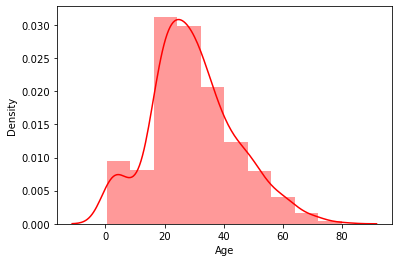

In [11]:
sns.distplot(data['Age'],bins=10,hist=True,kde=True,color="red")

In [12]:
data = data.replace({'Survived': {'Yes': 1,'No': 0}})

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
885,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,S
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S


In [14]:
from matplotlib import style
from matplotlib import pyplot as plt 

C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

Text(0.5, 1.0, 'Male')

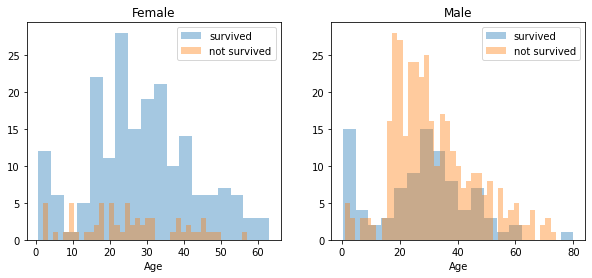

In [15]:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women=data[data['Sex']=='female']
men=data[data['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


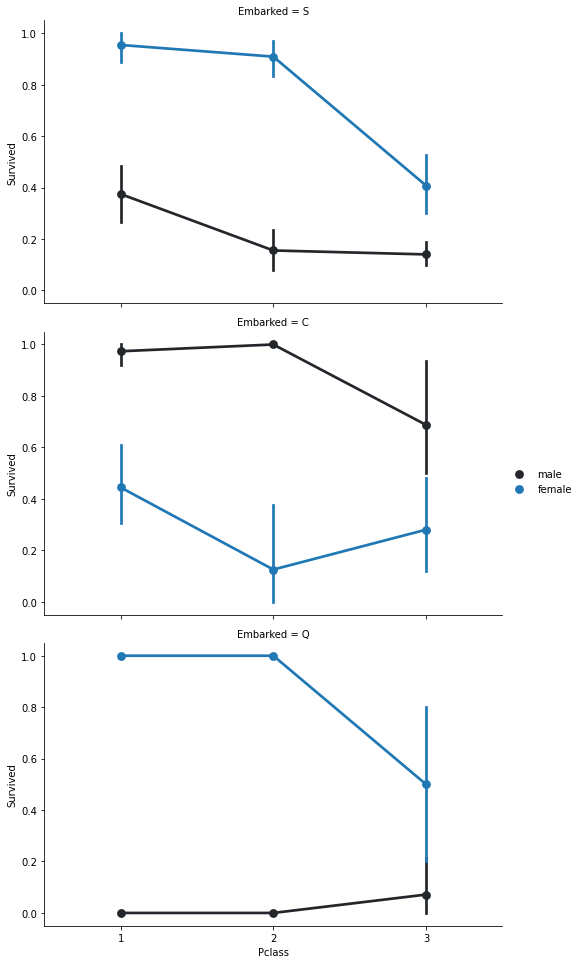

In [16]:
FacetGrid=sns.FacetGrid(data,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

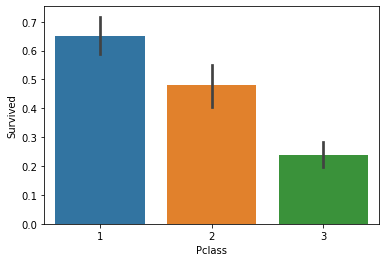

In [17]:
sns.barplot(x='Pclass',y='Survived',data=data)

C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


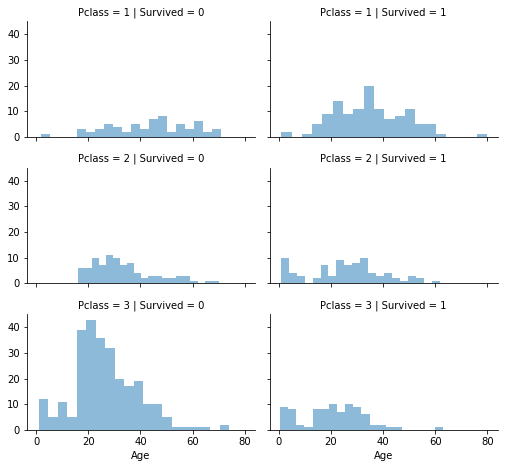

In [18]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [19]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

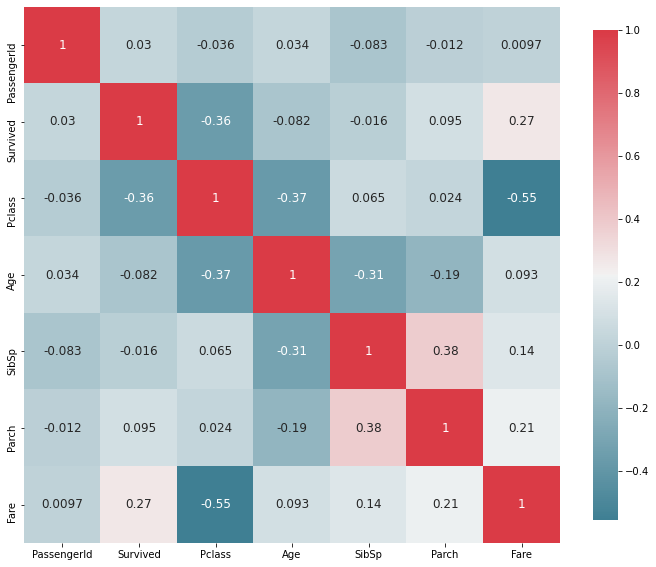

In [20]:
plot_correlation_map( data )
# Les coefficients de corrélation se situent dans l’intervalle [-1,1].
# – si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
# – si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
# – si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation 

# Fare a une forte corrélation avec Pclass du -0.55 et on n'oublie pas les autres attributs comme Survived,Parch. 
#  Parch et Sibsp ont une corrélation de 0.41; Age et Pclass ont une corrélation de -0.037 



In [21]:
data.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          395.500000  43.695312  0.359375  0.375000  67.356313
       1          500.775000  35.124333  0.508333  0.433333  99.083752
2      0          451.388889  33.544444  0.344444  0.155556  20.754953
       1          442.566265  25.901566  0.518072  0.674699  22.248595
3      0          450.362963  26.555556  0.625926  0.433333  13.180014
       1          412.176471  20.646118  0.458824  0.529412  13.386421

In [22]:
data['Title'].unique()

KeyError: 'Title'

In [ ]:
data1 = data
data1['Title'] = data1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
data1

In [ ]:
data1['Title'].unique()

In [ ]:
data1['Title'] = data1['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officier')
data1['Title'] = data1['Title'].replace(['Jonkheer', 'Don','Sir', 'Lady', 'Countess'], 'Royalty')
data1['Title'] = data1['Title'].replace(['Mlle', 'Mme'], 'Miss')
data1['Title'] = data1['Title'].replace('Mme', 'Mrs')
data1['Title'] = data1['Title'].replace(['Ms', 'Mr'], 'Mrs')

In [ ]:
data1['Title'].unique()

In [ ]:
grid = sns.FacetGrid(data1, col='Title', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
sns.barplot(x='Title',y='Age',data=data1)

In [ ]:
sns.barplot(x='Title',y='Fare',data=data1)

In [ ]:
sns.barplot(x='Title',y='SibSp',data=data1)

In [ ]:
sns.barplot(x='Title',y='Pclass',data=data1)

In [ ]:
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data1